
Yafet Abraham Mekonnen

# One-versus-Many: Predicting passenger survival on the *Titanic* using decision trees

**Note:** The dataset is from the [Vanderbilt Biostatistics Datasets](https://hbiostat.org/data/).

## Overview


Using scikit-learn, develop a [`DecisionTreeClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) classifier and a [`RandomForestClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) classifier based on the [`titanic.csv`](https://www.ecst.csuchico.edu/~bjuliano/csci581/datasets/titanic.csv) data file and compare their performance when predicting whether a passenger will survive or not.

## Data

The file [`titanic.csv`](https://www.ecst.csuchico.edu/~bjuliano/csci581/datasets/titanic.csv) contains the details of the 1309 passengers on board and importantly, will reveal whether they survived or not.
The dataset file details include:

*   `pclass`: passenger class; proxy for socio-economic status (1st ~ upper, 2nd ~ middle, 3rd ~ lower)
*   `survived`: survival status (0=No, 1=Yes)
*   `name`: passenger name
*   `sex`: passenger sex (male, female)
*   `age`: passenger age in years (fractional if age is less than 1; if age is estimated, it is in the form xx.5)
*   `sibsp`: number of siblings/spouses aboard (includes step-siblings; mistresses and fiances ignored)
*   `parch`: number of parents/children aboard (parent only considers mother or father; child includes stepchildren)
*   `ticket`: ticket number
*   `fare`: passenger fare (in pre-1970 British pounds)
*   `cabin`: cabin number
*   `embarked`: port of embarkation (C=Cherbourg, Q=Queenstown, S=Southampton)
*   `boat`: lifeboat number (if passenger boarded one)
*   `body`: body identification number
*   `home.dest`: passenger home/destination


# Solution

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier




In [ ]:
url = "https://www.ecst.csuchico.edu/~bjuliano/csci581/datasets/titanic.csv"
df = pd.read_csv(url)
df.dtypes

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

1.   all pertinent *exploratory data analysis* (EDA) code, visualizations, and justifications (you can reuse, perhaps with minimal modification, the work you did in your earlier Assignments);

In [ ]:
df.isnull().sum()


pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

Above it can be seen that features like age, fare, cabin, embarked, boat, body, and home.dest have missing values. 

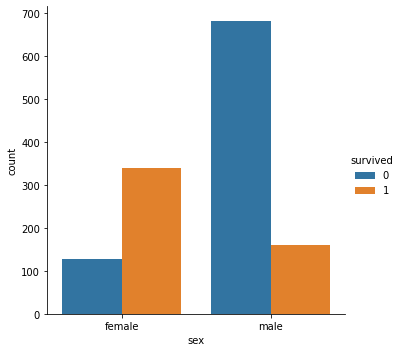

In [ ]:
sns.catplot(x ="sex", hue ="survived", kind ="count", data = df)



The graph above clearly shows that most male passengers did not survive the shipwreck comparing it with female passengers. Most of the passengers that survived were female.  

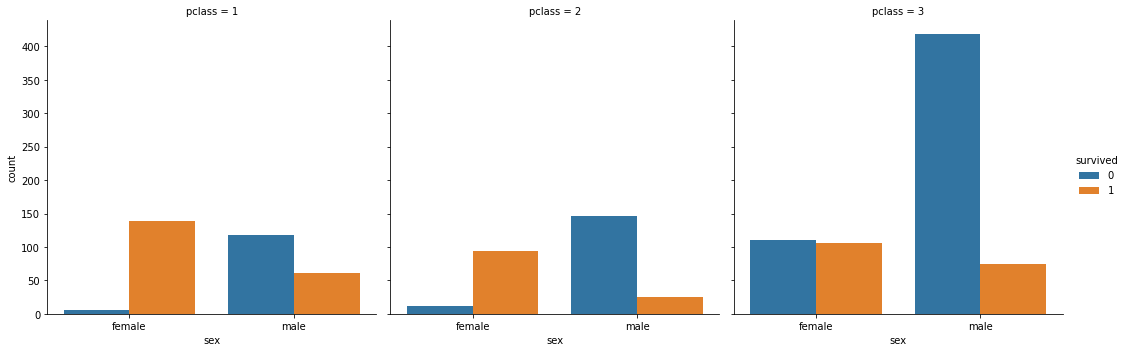

In [ ]:
sns.catplot(x ='sex', hue ='survived', kind ='count', col ='pclass', data = df)

The above graph also indicates that most of the male passengers did not survive. In addition, this graph provides more information about the socio-economic status where the lowest socio-economic class specifically the male having the highest death rate, and females in all socio-economic status have a lower death rate.  

In [ ]:
mean_age = df['age'].mean()
df['age'].fillna(mean_age,inplace=True)  # this code fill all the na with mean 


In the code above for the age feature, there are 263 missing values I chose to replace these with the mean value. 

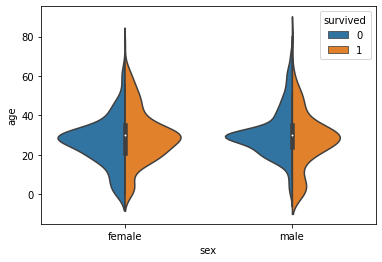

In [ ]:
sns.violinplot(x ="sex", y ="age", hue ="survived", data = df, split = True)

The graph above shows that in both genders most children within the age of 0 to 10 survived and the majority age group that did not survive is in the age between 20 to 40 in both genders, a male has more death rate in this group, but the death rate becomes less for both men and women as the age increase.

2.   explanations/justifications for all model selection decisions;


Decision Tree classifier graphical represent the possible outcomes with the use of a tree. In this dataset, we would look at the survival probability on the type of gender and social-economic class you are in. Random forest classifier consists of many decision trees and is used to predict whether a passenger will survive or not given different features. 

3.   all pertinent model diagnostics, including metrics and visualizations; and


In [ ]:
sex_numerical = pd.get_dummies(df['sex'],drop_first=True) # convert the sex column to numeric 
df['Sex_Numerical'] = sex_numerical   # insert into the datasets
df.drop(['name','sex','ticket','cabin','embarked','boat','home.dest','body'], axis=1,inplace=True)  # drop all these 
df.dtypes  #check the type
df.head() # only numberic vaules are there
mean_fare = df['fare'].mean()  # replace all the na of fare 
df['fare'].fillna(mean_fare,inplace=True)  # this code fill all the na with mean 



In [ ]:
corr = df.corr()
print(df.corr().abs().nlargest(3, 'survived').index) 

Index(['survived', 'Sex_Numerical', 'pclass'], dtype='object')


In [ ]:
features_v = df[['Sex_Numerical', 'pclass']]   
target_v = df['survived']


[Text(167.40000000000003, 190.26, 'Sex_Numerical <= 0.5\ngini = 0.472\nsamples = 1309\nvalue = [809, 500]\nclass = s'),
 Text(100.44000000000001, 135.9, 'pclass <= 2.5\ngini = 0.397\nsamples = 466\nvalue = [127, 339]\nclass = u'),
 Text(66.96000000000001, 81.53999999999999, 'pclass <= 1.5\ngini = 0.127\nsamples = 250\nvalue = [17, 233]\nclass = u'),
 Text(33.480000000000004, 27.180000000000007, 'gini = 0.067\nsamples = 144\nvalue = [5, 139]\nclass = u'),
 Text(100.44000000000001, 27.180000000000007, 'gini = 0.201\nsamples = 106\nvalue = [12, 94]\nclass = u'),
 Text(133.92000000000002, 81.53999999999999, 'gini = 0.5\nsamples = 216\nvalue = [110, 106]\nclass = s'),
 Text(234.36, 135.9, 'pclass <= 1.5\ngini = 0.309\nsamples = 843\nvalue = [682, 161]\nclass = s'),
 Text(200.88000000000002, 81.53999999999999, 'gini = 0.449\nsamples = 179\nvalue = [118, 61]\nclass = s'),
 Text(267.84000000000003, 81.53999999999999, 'pclass <= 2.5\ngini = 0.256\nsamples = 664\nvalue = [564, 100]\nclass = s'),

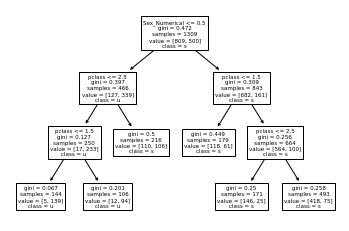

In [ ]:
titanic_model=DecisionTreeClassifier().fit(features_v, target_v)

list_col = list(df.keys()) 
list_col[1]    # get the target column name in a list 

# Plot the decision tree
plot_tree(titanic_model,feature_names= features_v.columns, class_names= list_col[1])


The above decision tree shows the relationship of the top two highly correlated features which are the gender and pclass towards the target feature. In addition, it also shows what attributes are likely to decide the probability of surviving. The root shows the Sex_Numerical feature which indicate that it is the best feature to use to predict the likelihood of surviving.  

In [ ]:
corr_r = df.corr()
print(df.corr().abs().nlargest(5, 'survived').index) 
features_v_r = df[['Sex_Numerical', 'pclass', 'fare','parch']]   


Index(['survived', 'Sex_Numerical', 'pclass', 'fare', 'parch'], dtype='object')


In [ ]:

train_set, test_set, train_labels, test_labels = train_test_split(features_v_r, target_v,test_size = 0.25,random_state = 1, 
                                                                  stratify = target_v) 
model = RandomForestClassifier( n_estimators=1000 )
model.fit(train_set, train_labels)
ypred = model.predict(test_set)


In [ ]:
print(metrics.classification_report(ypred, test_labels))


              precision    recall  f1-score   support

           0       0.85      0.82      0.84       211
           1       0.70      0.74      0.72       117

    accuracy                           0.79       328
   macro avg       0.77      0.78      0.78       328
weighted avg       0.80      0.79      0.79       328



Text(91.68, 0.5, 'true label')

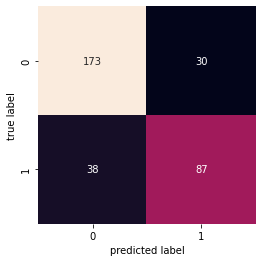

In [ ]:
mat = confusion_matrix(test_labels, ypred)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('predicted label');
plt.ylabel('true label')

 According to the confusion matrix table above the model predicted 173 passengers to not survive and 87 to survive. A total amount of 260 passengers were classified correctly however, a total amount of 68 was misclassified, using the four highest correlated features. 

In [ ]:
# Using three best features 
corr_r = df.corr()
print(df.corr().abs().nlargest(4, 'survived').index) 
features_v_r = df[['Sex_Numerical', 'pclass', 'fare']]

train_set, test_set, train_labels, test_labels = train_test_split(features_v_r, target_v,test_size = 0.25,random_state = 1, 
                                                                  stratify = target_v) 
model = RandomForestClassifier( n_estimators=1000 )
model.fit(train_set, train_labels)
ypred = model.predict(test_set)
print(metrics.classification_report(ypred, test_labels))



Index(['survived', 'Sex_Numerical', 'pclass', 'fare'], dtype='object')
              precision    recall  f1-score   support

           0       0.88      0.81      0.84       221
           1       0.66      0.78      0.72       107

    accuracy                           0.80       328
   macro avg       0.77      0.79      0.78       328
weighted avg       0.81      0.80      0.80       328



Text(91.68, 0.5, 'true label')

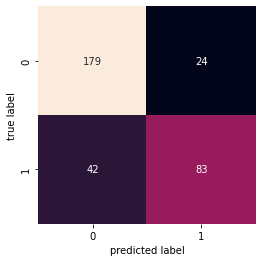

In [ ]:
mat = confusion_matrix(test_labels, ypred)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('predicted label');
plt.ylabel('true label')

 According to the confusion matrix table above the model predicted 179 passengers to not survive and 83 to survive. A total amount of 262 passengers were classified correctly however, a total amount of 66 was misclassified, using the three highest correlated features. The model now improved a little. 


In [ ]:
# Using two best features 
corr_r = df.corr()
print(df.corr().abs().nlargest(3, 'survived').index) 
features_v_r = df[['Sex_Numerical', 'pclass']]

train_set, test_set, train_labels, test_labels = train_test_split(features_v_r, target_v,test_size = 0.25,random_state = 1, 
                                                                  stratify = target_v) 
model = RandomForestClassifier( n_estimators=1000 )
model.fit(train_set, train_labels)
ypred = model.predict(test_set)
print(metrics.classification_report(ypred, test_labels))

Index(['survived', 'Sex_Numerical', 'pclass'], dtype='object')
              precision    recall  f1-score   support

           0       0.99      0.74      0.85       270
           1       0.44      0.95      0.60        58

    accuracy                           0.78       328
   macro avg       0.71      0.84      0.72       328
weighted avg       0.89      0.78      0.80       328



Text(91.68, 0.5, 'true label')

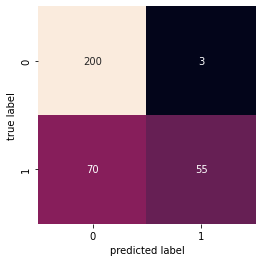

In [ ]:
mat = confusion_matrix(test_labels, ypred)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('predicted label');
plt.ylabel('true label')

According to the confusion matrix table above the model predicted 200 passengers to not survive and 55 to survive. A total amount of 255 passengers were classified correctly however, a total amount of 73 was misclassified, using the two highest correlated features. The model improved greatly on the passengers that did not survive changing from 179 to 200 classifying it correctly and misclassifying was only 3 passengers where the model indicate they survived but did not. 


# Conclusions

4.   your summary and conclusions pertaining to how the two models compare against each other.

---



In conclusion, the fewer features that are highly correlated taken the better the model performs. This is seen in how well the confusion matrix gets as fewer features are taken with the use of a correlation matrix as a feature selection technique.  
